#El objetivo de este proyecto es Scrapear datos renta variable de Bolsa Argentina para generar una base de datos que luego podamos manipular.


In [1]:
#Comenzamos importando e instalando las  librerias
!pip install beautifulsoup4

!pip install pandas

In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests
import numpy as np

In [2]:
# URL de la página que quieres analizar
url = 'https://bolsar.info/lideres.php'
#Intento caputrar las etiquetas
response = requests.get(url)
html = response.text
# Creaamos un objeto Beautiful Soup
soup = BeautifulSoup(html, 'html.parser')

In [3]:
et_2=soup.find_all ('dataTables_scrollBody')
et_2

[]

In [4]:
# Encontrar todas las etiquetas <th>(columnas)
etiquetas_th = soup.find_all('th')

# Ahora puedes trabajar con las etiquetas <tr> encontradas
for th in etiquetas_th:
    # Puedes imprimir el contenido de cada fila, por ejemplo:
    print(th.text)

Especie
Vto
Cant. Nominal
Compra
Venta
Cant. Nominal
Último
Variación
Apertura
Mín
Max
Cierre Anterior
Volumen
Monto
Oper
Hora


In [5]:
# Encontrar todas las etiquetas <th>(nuestras columnas)
etiquetas_th = soup.find_all('th')

# Lista para almacenar los nombres de las columnas
nombres_columnas = []

# Ahora trabajamos con las etiquetas <th> encontradas
for th in etiquetas_th:
    # Agregar el contenido de cada etiqueta a la lista
    nombres_columnas.append(th.text.strip())

# Convertir la lista a una matriz de 1x16
matriz_columnas = np.array([nombres_columnas])

# Imprimir la matriz de columnas
print(matriz_columnas)

[['Especie' 'Vto' 'Cant. Nominal' 'Compra' 'Venta' 'Cant. Nominal'
  'Último' 'Variación' 'Apertura' 'Mín' 'Max' 'Cierre Anterior' 'Volumen'
  'Monto' 'Oper' 'Hora']]


In [6]:
# Encontrar todas las etiquetas <tr>(nuestras filas)
etiquetas_tr = soup.find_all('tr')

# Ahora trabajamos con las etiquetas <tr> encontradas
for tr in etiquetas_tr:
    # Imprimimos el contenido de cada fila, por ejemplo:
    print(tr.text)


EspecieVtoCant. NominalCompraVentaCant. NominalÚltimoVariaciónAperturaMínMaxCierre AnteriorVolumenMontoOperHora

TGSU2
Cdo.
8
4.010,00
0,00
0
4.730,00 -0,83% 4.735,004.560,004.790,004.770,007.611,0035.814.885,0030616:28:57

SUPV
Cdo.
0
0,00
2.000,00
56
1.605,00 -4,17% 1.655,001.585,001.680,001.675,004.499,007.398.115,0012516:15:10

BBAR
Cdo.
0
0,00
4.500,00
225
3.555,00 -3,78% 3.575,003.530,003.780,003.695,007.773,0028.486.425,0050316:28:38

TRAN
24hs
0
0,00
1.805,00
31
1.555,00 -1,58% 1.580,001.530,001.595,001.580,00141.923,00222.040.165,0078016:59:53

TXAR
Cdo.
0
0,00
1.150,00
10
1.000,00 -5,66% 1.055,00999,001.055,001.060,0030.635,0031.445.489,0018216:29:36

TRAN
Cdo.
0
0,00
0,00
0
1.520,00 -3,49% 1.555,001.520,001.590,001.575,0037.426,0058.378.985,0022816:26:15

GGAL
24hs
100
3.500,00
3.900,00
3
3.725,00 -2,86% 3.815,003.675,003.880,003.835,001.368.409,005.209.340.515,004.77516:59:56

PAMP
Cdo.
7
2.075,00
2.800,00
250
2.445,00 -3,16% 2.540,002.425,002.540,002.525,0037.230,0091.731

In [7]:
#Encontrar todas las etiquetas <th>(columnas)
etiquetas_th = soup.find_all('th')

# Crear una lista para almacenar los nombres de las columnas
columnas = [th.text.strip() for th in etiquetas_th]

# Encontrar todas las etiquetas <tr>(filas)
etiquetas_tr = soup.find_all('tr')[1:]

# Crear una lista para almacenar los datos
datos = []

# Iterar sobre las etiquetas <tr> encontradas
for tr in etiquetas_tr:
    # Dividir la línea en una lista de valores
    valores = [td.text.strip() for td in tr.find_all('td')]

    # Verificar si la longitud de la lista de valores es igual a la cantidad de columnas
    if len(valores) == len(columnas):
        # Crear un diccionario con los nombres de las columnas como claves
        fila = {columnas[i]: valores[i] for i in range(len(columnas))}

        # Agregar la fila a la lista de datos
        datos.append(fila)

# Imprimir los datos
for fila in datos:
    print(fila)

{'Especie': 'TGSU2', 'Vto': 'Cdo.', 'Cant. Nominal': '0', 'Compra': '4.010,00', 'Venta': '0,00', 'Último': '4.730,00', 'Variación': '-0,83%', 'Apertura': '4.735,00', 'Mín': '4.560,00', 'Max': '4.790,00', 'Cierre Anterior': '4.770,00', 'Volumen': '7.611,00', 'Monto': '35.814.885,00', 'Oper': '306', 'Hora': '16:28:57'}
{'Especie': 'SUPV', 'Vto': 'Cdo.', 'Cant. Nominal': '56', 'Compra': '0,00', 'Venta': '2.000,00', 'Último': '1.605,00', 'Variación': '-4,17%', 'Apertura': '1.655,00', 'Mín': '1.585,00', 'Max': '1.680,00', 'Cierre Anterior': '1.675,00', 'Volumen': '4.499,00', 'Monto': '7.398.115,00', 'Oper': '125', 'Hora': '16:15:10'}
{'Especie': 'BBAR', 'Vto': 'Cdo.', 'Cant. Nominal': '225', 'Compra': '0,00', 'Venta': '4.500,00', 'Último': '3.555,00', 'Variación': '-3,78%', 'Apertura': '3.575,00', 'Mín': '3.530,00', 'Max': '3.780,00', 'Cierre Anterior': '3.695,00', 'Volumen': '7.773,00', 'Monto': '28.486.425,00', 'Oper': '503', 'Hora': '16:28:38'}
{'Especie': 'TRAN', 'Vto': '24hs', 'Cant. N

In [42]:
df = pd.DataFrame(datos)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Especie          42 non-null     object
 1   Vto              42 non-null     object
 2   Cant. Nominal    42 non-null     object
 3   Compra           42 non-null     object
 4   Venta            42 non-null     object
 5   Último           42 non-null     object
 6   Variación        42 non-null     object
 7   Apertura         42 non-null     object
 8   Mín              42 non-null     object
 9   Max              42 non-null     object
 10  Cierre Anterior  42 non-null     object
 11  Volumen          42 non-null     object
 12  Monto            42 non-null     object
 13  Oper             42 non-null     object
 14  Hora             42 non-null     object
dtypes: object(15)
memory usage: 5.1+ KB


In [26]:
df

,Especie,Vto,Cant. Nominal,Compra,Venta,Último,Variación,Apertura,Mín,Max,Cierre Anterior,Volumen,Monto,Oper,Hora
0,TGSU2,Cdo.,0,"4.010,00","0,00","4.730,00","-0,83%","4.735,00","4.560,00","4.790,00","4.770,00","7.611,00","35.814.885,00",306,16:28:57
1,SUPV,Cdo.,56,"0,00","2.000,00","1.605,00","-4,17%","1.655,00","1.585,00","1.680,00","1.675,00","4.499,00","7.398.115,00",125,16:15:10
2,BBAR,Cdo.,225,"0,00","4.500,00","3.555,00","-3,78%","3.575,00","3.530,00","3.780,00","3.695,00","7.773,00","28.486.425,00",503,16:28:38
3,TRAN,24hs,31,"0,00","1.805,00","1.555,00","-1,58%","1.580,00","1.530,00","1.595,00","1.580,00","141.923,00","222.040.165,00",780,16:59:53
4,TXAR,Cdo.,10,"0,00","1.150,00","1.000,00","-5,66%","1.055,00","999,00","1.055,00","1.060,00","30.635,00","31.445.489,00",182,16:29:36
5,TRAN,Cdo.,0,"0,00","0,00","1.520,00","-3,49%","1.555,00","1.520,00","1.590,00","1.575,00","37.426,00","58.378.985,00",228,16:26:15
6,GGAL,24hs,3,"3.500,00","3.900,00","3.725,00","-2,86%","3.815,00","3.675,00","3.880,00","3.835,00","1.368.409,00","5.209.340.515,00",4.775,16:59:56
7,PAMP,Cdo.,250,"2.075,00","2.800,00","2.445,00","-3,16%","2.540,00","2.425,00","2.540,00","2.525,00","37.230,00","91.731.995,00",657,16:28:11
8,CRES,24hs,220,"1.000,00","1.060,00","1.020,00","-2,39%","1.045,00","1.010,00","1.045,00","1.045,00","227.487,00","232.621.835,00",1.265,16:59:56
9,CEPU,Cdo.,35,"0,00","1.325,00","1.110,00","-3,47%","1.180,00","1.110,00","1.180,00","1.150,00","29.860,00","33.728.945,00",360,16:24:23


In [37]:
df['Variación']

0     -0,83%
1     -4,17%
2     -3,78%
3     -1,58%
4     -5,66%
5     -3,49%
6     -2,86%
7     -3,16%
8     -2,39%
9     -3,47%
10    -1,80%
11    -2,72%
12    -0,14%
13    -0,63%
14    -2,99%
15    -2,36%
16     0,00%
17    -0,93%
18    -3,04%
19    -5,66%
20    -4,46%
21    -1,81%
22     0,45%
23    -3,46%
24    -4,80%
25    -1,58%
26    -3,52%
27    -0,84%
28     1,27%
29    -1,72%
30    -4,15%
31    -2,47%
32    -3,10%
33    -2,81%
34     2,02%
35    -3,60%
36    -1,48%
37    -3,58%
38    -0,56%
39    -3,73%
40    -1,18%
41    -2,57%
Name: Variación, dtype: object

In [27]:
print("Valores únicos en la columna 'Vto':")
print(df['Vto'].unique())

Valores únicos en la columna 'Vto':
['Cdo.' '24hs']


In [41]:
df = pd.DataFrame(datos)

# Convertir la columna 'Último' y 'Variación' a numéricas, en caso de que no lo sean
df['Último'] = pd.to_numeric(df['Último'].str.replace(',', '').str.replace(' ', ''), errors='coerce')
df['Variación'] = pd.to_numeric(df['Variación'].str.replace(',', '').str.replace(' ', ''), errors='coerce')


# Filtrar las filas donde el valor de la columna 'Vto' sea '24hs'
df_filtered = df[df['Vto'] == '24hs']

# Seleccionar solo las columnas necesarias
df_filtered = df_filtered[['Especie', 'Último','Variación','Volumen','Cierre Anterior',]]
df_filtered

,Especie,Último,Variación,Volumen,Cierre Anterior
3,TRAN,1.555,NaN,"141.923,00","1.580,00"
6,GGAL,3.725,NaN,"1.368.409,00","3.835,00"
8,CRES,1.020,NaN,"227.487,00","1.045,00"
10,EDN,1.085,NaN,"167.048,00","1.105,00"
11,TGSU2,4.635,NaN,"280.186,00","4.765,00"
12,VALO,33750.000,NaN,"740.683,00","338,00"
16,MIRG,19.850,NaN,"3.967,70","19.850,00"
19,TXAR,1.000,NaN,"671.026,00","1.060,00"
21,SUPV,1.620,NaN,"273.745,00","1.650,00"
23,CEPU,1.115,NaN,"450.962,00","1.155,00"


In [43]:
print("Tipo de datos en 'Variación':", df['Variación'].dtype)


Tipo de datos en 'Variación': object



Top 5 Mejor Variación:
   Especie   Último  Variación Calculada
34    COME    239.5             2.023429
16    MIRG  19850.0             0.000000
12    VALO    337.5            -0.147929
38    YPFD  26250.0            -0.568182
25    IRSA   1245.0            -1.581028

Top 5 Peor Variación:
   Especie  Último  Variación Calculada
19    TXAR  1000.0            -5.660377
24    ALUA   990.0            -4.807692
39     BMA  6450.0            -3.731343
37    PAMP  2420.0            -3.585657
26    BBAR  3555.0            -3.527815


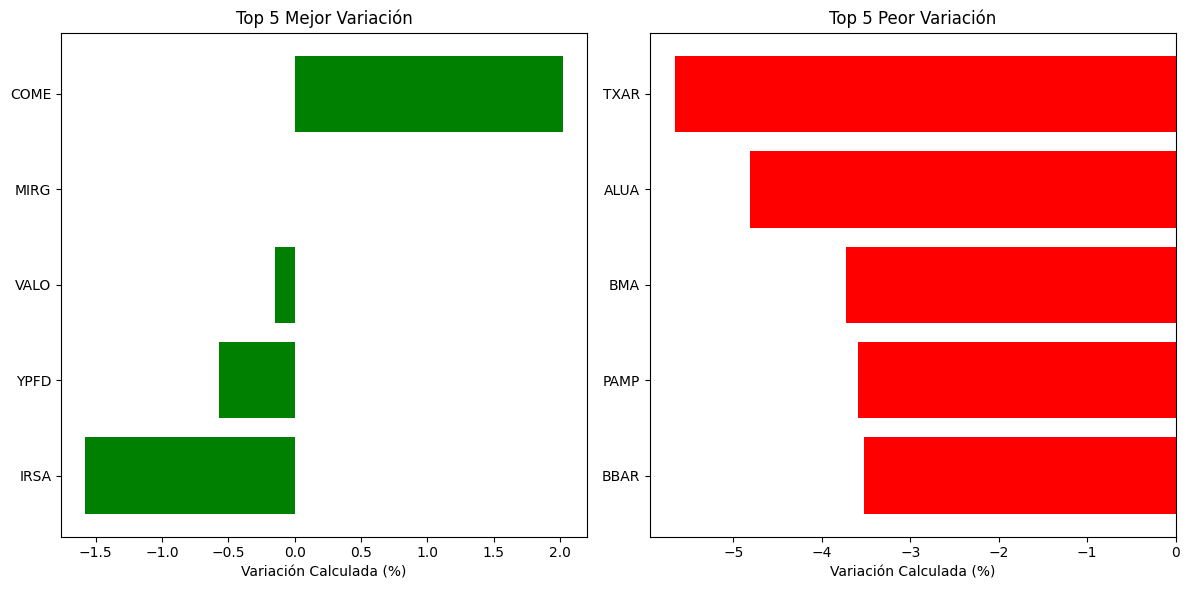

In [47]:
df = pd.DataFrame(datos)

# Reemplazar puntos y comas en las columnas numéricas
df['Último'] = df['Último'].str.replace('.', '', regex=False)  # Eliminar puntos (separadores de miles)
df['Último'] = df['Último'].str.replace(',', '.', regex=False)  # Reemplazar comas por puntos (separador decimal)

df['Cierre Anterior'] = df['Cierre Anterior'].str.replace('.', '', regex=False)  # Eliminar puntos (separadores de miles)
df['Cierre Anterior'] = df['Cierre Anterior'].str.replace(',', '.', regex=False)  # Reemplazar comas por puntos (separador decimal

# Convertir la columna 'Último' y 'Variación' a numéricas, en caso de que no lo sean
df['Último'] = pd.to_numeric(df['Último'].str.replace(',', '').str.replace(' ', ''), errors='coerce')
df['Cierre Anterior'] = df['Cierre Anterior'].str.replace(',', '').str.replace(' ', '')


# Paso 3: Convertir las columnas a numérico
df['Último'] = pd.to_numeric(df['Último'])
df['Cierre Anterior'] = pd.to_numeric(df['Cierre Anterior'])

# Paso 4: Calcular la variación, asegurarse de que no hay NaN en 'Cierre Anterior'
df['Variación Calculada'] = ((df['Último'] - df['Cierre Anterior']) / df['Cierre Anterior']) * 100

# Eliminar filas con valores NaN en 'Último', 'Cierre Anterior' o 'Variación Calculada'
df = df.dropna(subset=['Último', 'Cierre Anterior', 'Variación Calculada'])

# Eliminar espacios y normalizar los valores en 'Vto'
df['Vto'] = df['Vto'].str.strip().str.lower()

# Filtrar las filas donde el valor de la columna 'Vto' sea '24hs'
df_filtered = df[df['Vto'] == '24hs']


# Seleccionar solo las columnas necesarias
df_filtered = df_filtered[['Especie', 'Último', 'Variación Calculada']]

# Obtener el top 5 de empresas con mejor variación
top_5_mejor_variacion = df_filtered.nlargest(5, 'Variación Calculada')

# Obtener el top 5 de empresas con peor variación
top_5_peor_variacion = df_filtered.nsmallest(5, 'Variación Calculada')

# Verificar si los DataFrames top_5_mejor_variacion y top_5_peor_variacion no están vacíos
print("\nTop 5 Mejor Variación:")
print(top_5_mejor_variacion)

print("\nTop 5 Peor Variación:")
print(top_5_peor_variacion)

# Crear gráficos de barras invertidas
plt.figure(figsize=(12, 6))

# Gráfico de mejor variación
plt.subplot(1, 2, 1)
plt.barh(top_5_mejor_variacion['Especie'], top_5_mejor_variacion['Variación Calculada'], color='green')
plt.xlabel('Variación Calculada (%)')
plt.title('Top 5 Mejor Variación')
plt.gca().invert_yaxis()

# Gráfico de peor variación
plt.subplot(1, 2, 2)
plt.barh(top_5_peor_variacion['Especie'], top_5_peor_variacion['Variación Calculada'], color='red')
plt.xlabel('Variación Calculada (%)')
plt.title('Top 5 Peor Variación')
plt.gca().invert_yaxis()

# Ajustar y mostrar gráficos
plt.tight_layout()
plt.show()

In [78]:

# Convertir la lista de diccionarios a un DataFrame
df = pd.DataFrame(datos)

# Imprimir el DataFrame
print(df)

# Guardar el DataFrame como un archivo CSV
df.to_csv('datos_scrapeados.csv', index=False)

   Especie   Vto Cant. Nominal     Compra      Venta     Último Variación  \
0     ALUA  Cdo.            72   1.090,00   1.097,00   1.090,50     1,39%   
1     ALUA  24hs           648   1.080,00   1.110,00   1.080,00    -1,55%   
2     ALUA  48hs            50   1.092,00   1.096,50   1.093,00     0,88%   
3     BBAR  Cdo.           218   1.995,00   1.999,00   1.999,00     4,11%   
4     BBAR  24hs           140   1.910,00   2.100,00   1.880,00    -0,97%   
5     BBAR  48hs         2.193   1.989,50   1.997,20   1.987,50     4,31%   
6      BMA  Cdo.            21   3.110,00   3.133,60   3.110,00     5,13%   
7      BMA  24hs            65   3.020,00   3.125,00   2.990,00     0,67%   
8      BMA  48hs           315   3.120,50   3.130,00   3.130,00     4,82%   
9     BYMA  Cdo.             4   1.016,00   1.020,00   1.020,00     4,94%   
10    BYMA  24hs             0     900,50       0,00     895,00     2,29%   
11    BYMA  48hs         2.881   1.023,00   1.025,00   1.025,00     5,24%   